In [159]:
pip install pandas numpy matplotlib seaborn scikit-learn

Import libraries

In [160]:
import numpy as np             
import pandas as pd        
import matplotlib.pyplot as plt    
import seaborn as sns   

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

Data Collection & Processing

In [161]:
#load the data
data = pd.read_csv(r'F:\ML Projects\Titanic Survival Predictor\train.csv')                                                                                                            

In [162]:
data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
data.shape  

(891, 12)

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [165]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handeling the missing values

In [166]:
data = data.drop(columns=['Cabin'], axis=1)

In [167]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data.isnull().sum()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19396\3405002090.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [168]:
print(data['Embarked'].mode()[0])
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

S


C:\Users\lenovo\AppData\Local\Temp\ipykernel_19396\3055747492.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


Data Analysis

In [169]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [170]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Data Visualization

<Axes: xlabel='Survived', ylabel='count'>

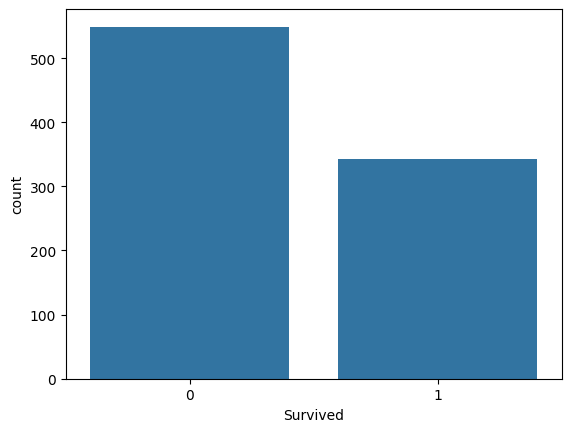

In [171]:
sns.countplot(x='Survived', data=data)

<Axes: xlabel='Sex', ylabel='count'>

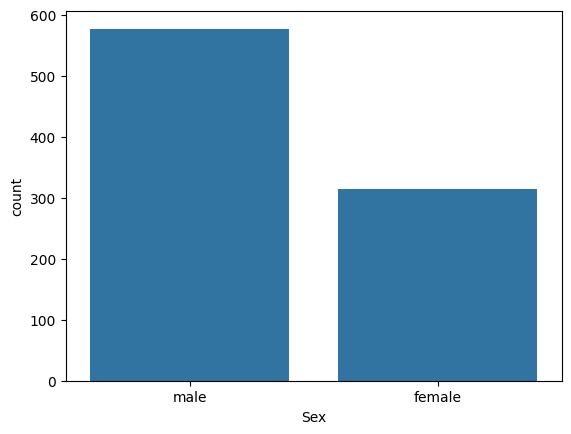

In [172]:
sns.countplot(x='Sex',data=data)

<Axes: xlabel='Sex', ylabel='count'>

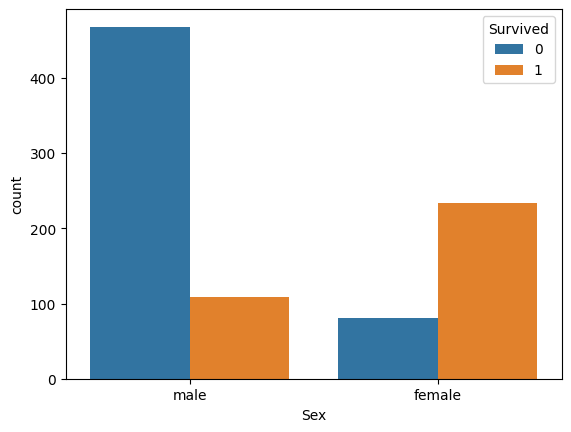

In [173]:
sns.countplot(x='Sex',hue='Survived',data=data)

In [174]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

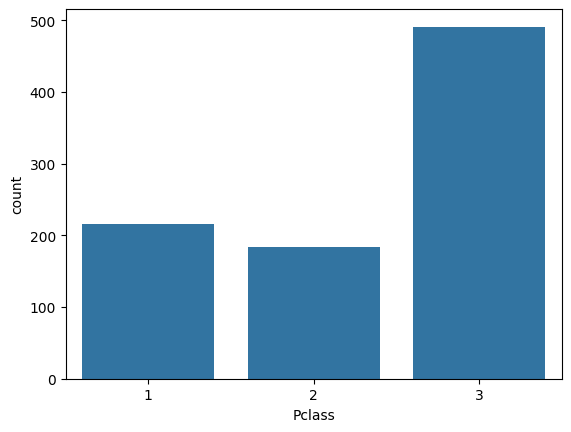

In [175]:
sns.countplot(x='Pclass',data=data)

<Axes: xlabel='Pclass', ylabel='count'>

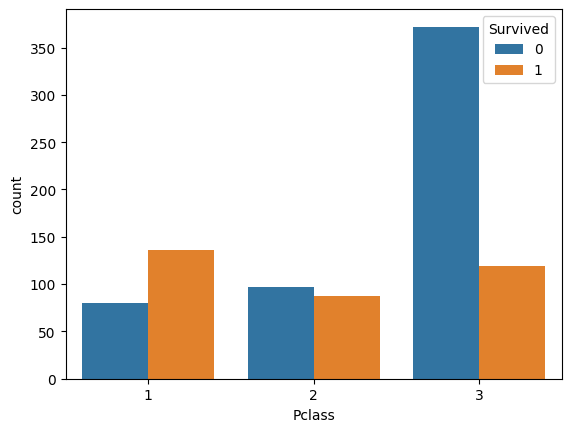

In [176]:
sns.countplot(x='Pclass',hue='Survived',data=data) 

Encoding Categorical columns

In [177]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [178]:
data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [179]:
data['Sex'] = data['Sex'].replace({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
data.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19396\3597416366.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace({'male': 0, 'female': 1})
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19396\3597416366.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Embarked'] = data['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [180]:
X = data.drop(columns=['PassengerId', 'Name', 'Ticket','Survived'], axis=1)
Y = data['Survived']

In [181]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [182]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting the data into test & train

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [184]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


Model Training

In [185]:
# Instantiate and train the Linear Regression model
model = LinearRegression()


In [186]:
model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

#Accuracy score

In [187]:
#Accuracy on training data
X_train_prediction = model.predict(X_train)

In [188]:
print(X_train_prediction)

[ 3.89705039e-01  7.02111202e-01 -4.03455209e-02  4.87211550e-03
  1.41270509e-01  2.45478740e-01  7.33314358e-02  7.31733024e-01
  3.81187558e-01  7.53510426e-02  2.37630105e-01  8.82400038e-01
  9.42131451e-02  7.60101282e-02  4.68752410e-01  3.26792478e-01
  6.64598548e-01  3.97700324e-02  1.43991294e-01 -1.29131167e-01
  3.07847279e-01  1.24657688e-01  6.92008809e-01  2.83660810e-01
  9.02930482e-02  9.31705602e-01  4.24406690e-01  4.57758641e-02
  4.58847453e-01 -1.46554800e-02  5.61712286e-01  8.32938343e-01
  2.20166685e-01 -9.86216666e-02  6.09940338e-01 -7.26621216e-02
  8.72935807e-01  1.91442091e-01  5.60814781e-01  4.01600734e-01
 -7.39774906e-03  1.47096433e-01  3.45359714e-01  6.54641148e-01
  7.95657766e-01 -2.78414068e-02  8.00437164e-02  8.73317955e-01
  1.44735807e-01  9.58690230e-01  1.60869491e-01  6.74512785e-01
  4.03304150e-01  1.33472837e-01  1.64931372e-01  3.18177473e-01
  4.25707192e-01  1.07718911e-01  8.24609757e-01  5.10498717e-02
  1.02590636e+00  3.49056

In [189]:
# Convert continuous predictions to binary values
X_train_prediction_binary = [1 if pred >= 0.5 else 0 for pred in X_train_prediction]

# Calculate accuracy score for training data
training_data_accuracy = accuracy_score(Y_train, X_train_prediction_binary)
print('Accuracy on Training data : ', training_data_accuracy)



Accuracy on Training data :  0.8089887640449438


In [190]:
# Predict on test data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)


[ 0.34086842  0.13374196  0.75057651  0.10877664  0.45041452  0.07326135
  0.08748924  0.10652921  0.23509916  0.2345133   0.21782638  0.87628384
  0.58894069  0.09737169  0.09737169  0.60654698  0.05380574 -0.05786096
  0.69231491 -0.09221362  0.52383867  0.56694401  0.07095429  0.59401823
  0.21609675  0.71971775  0.62000211  0.33618134  0.08741508  0.08483855
  0.14039742  0.02939869  0.53486316  0.43421372  0.39119557  0.56330908
  0.96187202  0.01518556  0.07528095  0.21078098  0.01917865 -0.02612221
  0.63679866  0.10273647  0.13391619  0.54966682  1.0152182   0.07562945
  0.16141525  0.77438457  0.07535104  0.28057721  0.25885336  0.31285811
  0.23091782  0.26184626  0.70651896  0.13402037 -0.06807909  0.05985006
  0.67483671  0.37975498  0.03977003  0.07498741  0.76313644  0.05385368
  0.81033721  0.25552353  0.07148383  0.10970257  0.57662    -0.22213391
  0.61165975  0.08664045  0.6099969   0.34194043  0.1538788   0.3730427
  0.80087585  0.08192752  1.01893144  0.4307592  -0.

In [191]:
# Convert continuous predictions to binary values for test data
X_test_prediction_binary = [1 if pred >= 0.5 else 0 for pred in X_test_prediction]

# Calculate accuracy score for test data
test_data_accuracy = accuracy_score(Y_test, X_test_prediction_binary)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7541899441340782
